## これは何?

初心者向け講座#1の内容から学習・予測に不要な部分を排除した notebook です。メインの処理を追い駆けたい!という時にお使いください。

## Note:

**事前学習済みモデルは利用禁止です!**

### 基本の設定

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os

import pandas as pd
import numpy as np
from glob import  glob

import matplotlib.pyplot as plt
import seaborn as sns

### 各種ディレクトリの定義

In [3]:
dataset_root = '/content/drive/MyDrive/atmaCup/#11/dataset_atmaCup11'
assert dataset_root is not None

input_dir = os.path.join(dataset_root, "inputs")
photo_dir = os.path.join(input_dir, "photos")

# output_dir = os.path.join(dataset_root, "output_ver7")
# os.makedirs(output_dir, exist_ok=True)

train_df = pd.read_csv(os.path.join(input_dir, 'train.csv'))
test_df = pd.read_csv(os.path.join(input_dir, 'test.csv'))

material_df = pd.read_csv(os.path.join(input_dir, 'materials.csv'))
technique_df = pd.read_csv(os.path.join(input_dir, 'techniques.csv'))

In [4]:
cv_output_dir = os.path.join(dataset_root, "train_cv")
os.makedirs(cv_output_dir, exist_ok=True)

part6_dir = os.path.join(dataset_root, "output_ver6")
os.makedirs(part6_dir, exist_ok=True)

part7_dir = os.path.join(dataset_root, "output_ver7")
os.makedirs(part7_dir, exist_ok=True)

In [7]:
part6_0_test = pd.read_csv(os.path.join(part6_dir, '0_575_0.7429300858080099.pth_tta_100.csv'))
part6_1_test = pd.read_csv(os.path.join(part6_dir, '1_588_0.7294393614025422.pth_tta_100.csv'))
part6_2_test = pd.read_csv(os.path.join(part6_dir, '2_463_0.7417682712183739.pth_tta_100.csv'))
part6_3_test = pd.read_csv(os.path.join(part6_dir, '3_356_0.7573302981391986.pth_tta_100.csv'))
part6_4_test = pd.read_csv(os.path.join(part6_dir, '4_595_0.7245590188672669.pth_tta_100.csv'))
part7_0_test = pd.read_csv(os.path.join(part7_dir, '0_759_0.72746655380399.pth_tta_100.csv'))
part7_1_test = pd.read_csv(os.path.join(part7_dir, '1_1347_0.6933037413138718.pth_tta_100.csv'))
part7_2_test = pd.read_csv(os.path.join(part7_dir, '2_1386_0.7231483330656671.pth_tta_100.csv'))
part7_3_test = pd.read_csv(os.path.join(part7_dir, '3_1164_0.7059597511300482.pth_tta_100.csv'))
part7_4_test = pd.read_csv(os.path.join(part7_dir, '4_1368_0.7203790855132016.pth_tta_100.csv'))

In [8]:
part7_0_test2 = pd.read_csv(os.path.join(part7_dir, '0_1550_0.7028937192357554.pth_tta_100.csv'))
part7_1_test2 = pd.read_csv(os.path.join(part7_dir, '1_1525_0.6691726793275264.pth_tta_100.csv'))
part7_2_test2 = pd.read_csv(os.path.join(part7_dir, '2_1545_0.7086766993422456.pth_tta_100.csv'))
part7_3_test2 = pd.read_csv(os.path.join(part7_dir, '3_1513_0.7065476286200639.pth_tta_100.csv'))
part7_4_test2 = pd.read_csv(os.path.join(part7_dir, '4_1508_0.19250628150071905.pth_tta_100.csv'))

In [ ]:
# class Config:
#     N_FOLDS = 5
#     N_EPOCHS = 30

### 画像データの読み込み

In [ ]:
# from PIL import Image

# def to_img_path(object_id):
#     return os.path.join(photo_dir, f'{object_id}.jpg')

# def read_image(object_id):
#     return Image.open(to_img_path(object_id))

In [ ]:
# !pip uninstall scikit-learn
# !pip install --pre --extra-index https://pypi.anaconda.org/scipy-wheels-nightly/simple scikit-learn

Found existing installation: scikit-learn 0.22.2.post1
Uninstalling scikit-learn-0.22.2.post1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/scikit_learn-0.22.2.post1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/sklearn/*
Proceed (y/n)? y
  Successfully uninstalled scikit-learn-0.22.2.post1
Looking in indexes: https://pypi.org/simple, https://pypi.anaconda.org/scipy-wheels-nightly/simple
     |████████████████████████████████| 22.9 MB 1.7 MB/s 


In [ ]:
# !pip install timm

In [ ]:
# import torch
# from torch import nn
# from torch.optim import Adam
# from torch.optim.optimizer import Optimizer
# from torch.utils import data

# # torchvision
# from torchvision import transforms as T
# # from torchvision.models import resnet34
# # import timm
# from torchvision.models import resnet18

# scikit-learn
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, StratifiedGroupKFold

In [ ]:
# IMG_MEAN = [0.485, 0.456, 0.406]
# IMG_STD = [0.229, 0.224, 0.225]

# class AtmaDataset(data.Dataset):
#     """atmaCup用にデータ読み込み等を行なうデータ・セット"""
#     object_path_key = "object_path"
#     label_key = "target"

#     @property
#     def meta_keys(self):
#         retval = [self.object_path_key]

#         if self.is_train:
#             retval += [self.label_key]

#         return retval

#     def __init__(self, meta_df: pd.DataFrame, is_train=True):
#         """
#         args:
#             meta_df: 
#                 画像へのパスと label 情報が含まれている dataframe
#                 必ず object_path に画像へのパス, target に正解ラベルが入っている必要があります
            
#             is_train:
#                 True のとき学習用のデータ拡張を適用します.
#                 False の時は単に size にリサイズを行います
#         """

#         self.is_train = is_train
#         for k in self.meta_keys:
#             if k not in meta_df:
#                 raise ValueError("meta df must have {}".format(k))

#         self.meta_df = meta_df.reset_index(drop=True)
#         self.index_to_data = self.meta_df.to_dict(orient="index")

#         size = (256, 256)

#         additional_items = (
#             [T.Resize(size)]
#             if not is_train
#             else [
#                 T.RandomVerticalFlip(),
#                 T.RandomHorizontalFlip(),
#                 T.RandomResizedCrop(size),
#             ]
#         )

#         self.transformer = T.Compose(
#             [*additional_items, T.ToTensor(), T.Normalize(mean=IMG_MEAN, std=IMG_STD)]
#         )

#     def __getitem__(self, index):
#         data = self.index_to_data[index]

#         obj_path, label = data.get(self.object_path_key), data.get(self.label_key, -1)
#         img = Image.open(obj_path)
#         img = self.transformer(img)
#         return img, label

#     def __len__(self):
#         return len(self.meta_df)

In [ ]:
# # CUDA を使うので確認. google colab の場合 GPU accelerator をオンにしておいてください
# assert torch.cuda.is_available()

# DEVICE = torch.device("cuda")

## Train / Validation Phase

In [ ]:
# def train(
#     model: nn.Module,
#     optimizer: Optimizer,
#     train_loader: data.DataLoader
# ) -> pd.Series:

#     # train にすることで model 内の学習時にのみ有効な機構が有効になります (Dropouts Layers、BatchNorm Layers...)
#     model.train()
    
#     criterion = nn.MSELoss()
    
#     for i, (x_i, y_i) in enumerate(train_loader):
#         x_i = x_i.to(DEVICE)
#         y_i = y_i.to(DEVICE).reshape(-1, 1).float()

#         output = model(x_i)
#         loss = criterion(output, y_i)

#         optimizer.zero_grad()
#         loss.backward()
#         optimizer.step()

# def predict(model: nn.Module, loader: data.DataLoader) -> np.ndarray:
#     # train とは逆で model 内の学習時にのみ有効な機構がオフになります (Dropouts Layers、BatchNorm Layers...)
#     model.eval()
    
#     predicts = []
    
#     for x_i, y_i in loader:
        
#         # 明示的に勾配を計算しないように指定することができます. 
#         # この関数ではモデルの更新はせずに単に出力だけを使いますので勾配は不要です.
#         with torch.no_grad():
#             output = model(x_i.to(DEVICE))

#         predicts.extend(output.data.cpu().numpy())

#     pred = np.array(predicts).reshape(-1)
#     return pred


def calculate_metrics(y_true, y_pred) -> dict:
    """正解ラベルと予測ラベルから指標を計算する"""    
    return {
        'rmse': mean_squared_error(y_true, y_pred) ** .5
    }


# def valid(
#     model: nn.Module, 
#     y_valid: np.ndarray, 
#     valid_loader: data.DataLoader
# ) -> pd.Series:
#     """検証フェーズ
#     与えられたモデル・データローダを使って検証フェーズを実行。スコアの dict と予測した値を返す
#     """
    
#     pred = predict(model, valid_loader)
#     score = calculate_metrics(y_valid, pred)
#     return score, pred

## Run Fold

1. train / valid の loader 作成
2. 以下を epoch 数だけ繰り返す
    1. 学習用データで学習 
    2. 検証用データで検証スコアの算出

In [ ]:
# def calc_cv(
#     model: nn.Module, 
#     valid_df: pd.DataFrame, 
#     y_valid: np.ndarray,
#     n_tta: int) -> float:
#     """
#     train / valid に分割されたデータで学習と同時に検証を行なう
#     """
    
#     #   : 検証用の方は is_train=False にしてデータ拡張オフにする
#     valid_dataset = AtmaDataset(meta_df=valid_df, is_train=False)
#     valid_loader = data.DataLoader(valid_dataset, batch_size=256, num_workers=4)
    
#     # optimizer の定義
#     optimizer = Adam(model.parameters(), lr=1e-3)

#     best_score = float('inf')
#     best_model_path = None
#     best_model = None

#     model_scores = []

#     for epoch in range(1, n_epochs + 1):
#         print(f'start {epoch}')
        
#         # 1: 学習用データで学習を実行。学習時のロスを取得
#         train(model, optimizer, train_loader)

#         # 2: 検証データでのスコアを計算
#         score_valid, y_valid_pred = valid(model=model, valid_loader=valid_loader, y_valid=y_valid)

#         model_scores.append(score_valid['rmse'])

#         model_path = os.path.join(output_dir, str(i) + '_' + str(epoch) + '_' + str(score_valid['rmse']) + '.pth')

#         if best_score > score_valid['rmse']:
#             best_score = score_valid['rmse']
#             best_model_path = model_path
#             best_model = model.state_dict()
    
#     torch.save(best_model, best_model_path)

#     torch.save(model.state_dict(), model_path)

#     fig = plt.figure()

#     plt.plot(list(range(n_epochs)), model_scores)

#     fig.savefig(os.path.join(output_dir, "scores_(" + str(i) + ")_" + str(1) + "-" + str(n_epochs) + ").png"))

#     return best_score, best_model_path

### その他

モデル作成などの関数定義

In [ ]:
# def create_model():
#     model = resnet18(pretrained=False)
#     model.fc = nn.Linear(in_features=512, out_features=1, bias=True)    
#     return model
    
def create_metadata(input_df):
    out_df = input_df[['object_id']].copy()
    # out_df['object_path'] = input_df['object_id'].map(to_img_path)
    
    if "target" in input_df:
        out_df["target"] = (input_df['sorting_date'] - 1550) / 100

    return out_df

# # def run_test_predict(model):
# #     test_meta_df = create_metadata(test_df)

# #     # 学習時のデータ拡張はオフにしたいので is_train=False としている
# #     test_dataset = AtmaDataset(meta_df=test_meta_df, is_train=False)
# #     test_loader = data.DataLoader(dataset=test_dataset, batch_size=128, drop_last=False, num_workers=4)
    
# #     y_pred = predict(model, loader=test_loader)
# #     return y_pred

In [ ]:
# from tqdm import tqdm

# def run_test_predict(model, input_df, n_tta=0):
#     # n_tta > 0 の時だけデータ拡張を on にする (is_train = True)
#     is_tta_mode = n_tta > 0
#     test_dataset = AtmaDataset(meta_df=input_df, is_train=is_tta_mode)
#     test_loader = data.DataLoader(dataset=test_dataset, batch_size=128, drop_last=False, num_workers=4)

#     predictions = []
#     n_times = 1 if not is_tta_mode else n_tta
#     print(f"run #{n_times} times / tta={is_tta_mode}")
#     for _ in tqdm(range(n_times)):
#         y_pred = predict(model, loader=test_loader)
#         predictions.append(y_pred)

#     return np.array(predictions).mean(axis=0)

In [ ]:
# train_df.columns

In [ ]:
def total_rmse(model_scores):
    total_rmse = 0
    for model_score in model_scores:
      total_rmse += model_score ** 2
    total_rmse /= 5
    total_rmse = total_rmse ** 0.5
    print('total_rmse: ' + str(total_rmse))

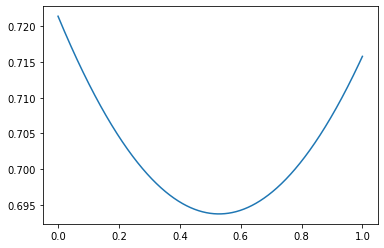

0.529 0.6937227018774008


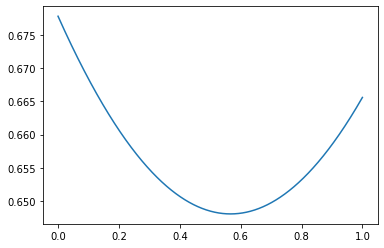

0.567 0.6480579004555418


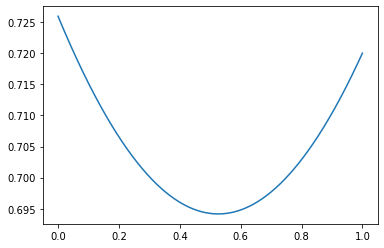

0.526 0.694156008571762


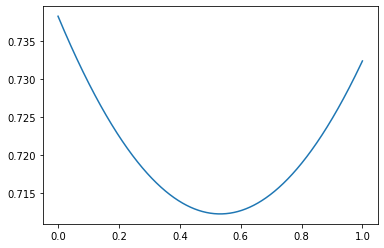

0.533 0.7122516093171927


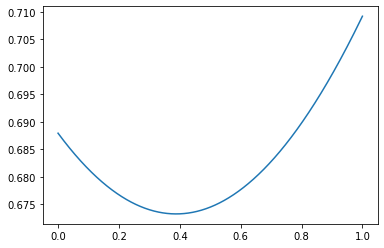

0.388 0.673256901989923


In [ ]:
train_meta_df = create_metadata(train_df)

fold = StratifiedGroupKFold(n_splits=5, shuffle=False)
cv = list(fold.split(X=train_df, y=train_df['target'], groups=train_df['art_series_id']))[:5]
part6_trs = [part6_0_tr, part6_1_tr, part6_2_tr, part6_3_tr, part6_4_tr]
part7_trs = [part7_0_tr, part7_1_tr, part7_2_tr, part7_3_tr, part7_4_tr]

model_scores = []
ratios = []

for i, (idx_tr, idx_valid) in enumerate(cv):

    valid_meta_df=train_meta_df.iloc[idx_valid]
    y_valid=train_meta_df['target'].values[idx_valid]
    
    part6_tr = part6_trs[i]['target']
    part7_tr = part7_trs[i]['target']

    ensemble_scores = []
    min_ensemble_score = float('inf')
    vest_ratio = None

    for i in range(1001):
        ratio = i / 1000
        ensemble_score = calculate_metrics(y_valid, part6_tr * ratio + part7_tr * (1 - ratio))['rmse']
        ensemble_scores.append(ensemble_score)
        if ensemble_score < min_ensemble_score:
            min_ensemble_score = ensemble_score
            vest_ratio = ratio
    plt.plot([i / 1000 for i in range(1001)], ensemble_scores)
    plt.show()

    ratios.append(vest_ratio)

    print(vest_ratio, min_ensemble_score)

    model_scores.append(min_ensemble_score)

In [ ]:
model_scores

[0.6937227018774008,
 0.6480579004555418,
 0.694156008571762,
 0.7122516093171927,
 0.673256901989923]

In [ ]:
total_rmse(model_scores)

total_rmse: 0.6846400521049298


In [9]:
ratios = [0.529, 0.567, 0.526, 0.533, 0.388]

In [10]:
test_predictions = []

part6_test = [part6_0_test, part6_1_test, part6_2_test, part6_3_test, part6_4_test]
part7_test = [part7_0_test, part7_1_test, part7_2_test, part7_3_test, part7_4_test]
part7_test2 = [part7_0_test2, part7_1_test2, part7_2_test2, part7_3_test2, part7_4_test2]

for i in range(5):
    ensemble_y = part6_test[i]['target'] * ratios[i] + (part7_test[i]['target'] + part7_test2[i]['target']) * (1 - ratios[i]) / 2
    test_predictions.append(ensemble_y)

In [12]:
# すべての予測の平均値を使う
pred_mean = np.array(test_predictions).mean(axis=0)

pred_mean[pred_mean < 0] = 0
pred_mean[pred_mean > 3] = 3


pd.DataFrame({
    "target": pred_mean
}).to_csv(os.path.join(cv_output_dir, "submission20210722_1755.csv"), index=False)